<a href="https://colab.research.google.com/github/Patrick-cmd-alt/binding/blob/main/leash_bio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [2]:
#installs kaggle
 !pip install -q kaggle

In [3]:
# Imports the kaggle json file, which is the key to access you kaggle acount
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"patrickberlin","key":"983e6a3889f5c6d9a9ac7ee73c85f2a6"}'}

In [4]:
# creates a folder and gives it the right permission to execute it (not sure if neccessary)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# downloads compressed filed form kaggle
!kaggle competitions download -c leash-BELKA


100% 4.16G/4.16G [00:37<00:00, 193MB/s]
100% 4.16G/4.16G [00:37<00:00, 118MB/s]


In [6]:
# unzip the compressed files
!unzip -q /content/leash-BELKA.zip

In [3]:
# puts the first nrows into the data frame, which takes 2.3 GB. The whole cvs file needs over 50 GB memory
df = pd.read_csv("/content/train.csv", nrows=20000000)

In [4]:
df_sorted = df.sort_values(by="binds", ascending=False)


In [5]:
unique_values = df["binds"].unique()


In [6]:
distribution = df["binds"].value_counts()
print(distribution)


binds
0    19861488
1      138512
Name: count, dtype: int64


In [50]:
# The target Value is boolean, 0 and 1 unfortunatley the distribution is not equal


<ipython-input-6-7b1869b3b819>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='id', y='protein_name', inner='stick', palette='Dark2')


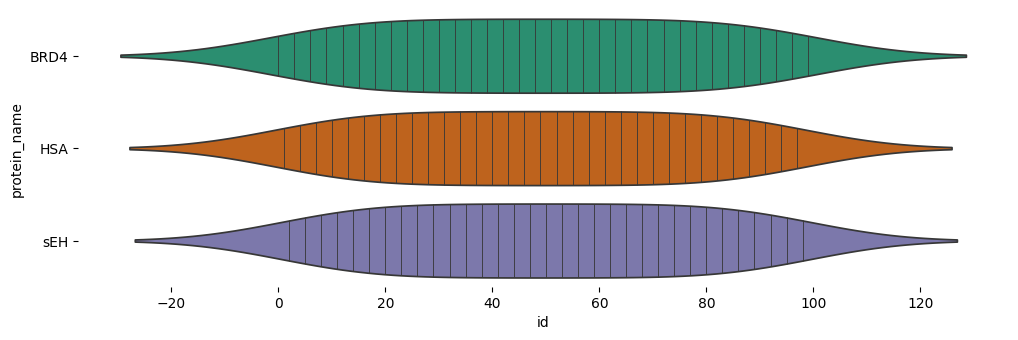

In [6]:
# @title protein_name vs id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['protein_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='id', y='protein_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

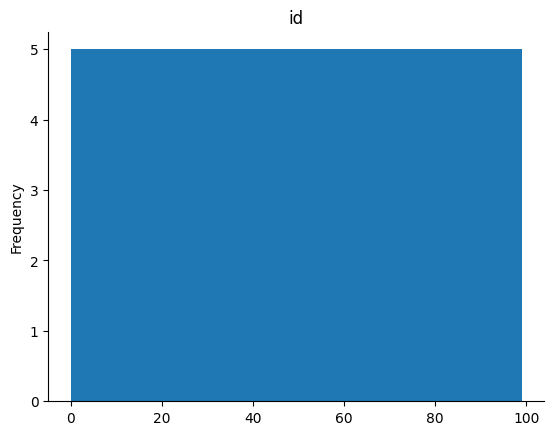

In [5]:
# @title id

from matplotlib import pyplot as plt
df['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)